# Data generation

In [31]:
# Data generation
from sklearn.datasets import make_circles 
import numpy as np
import pandas as pd

n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

# Lets understand the data
# X contains 1000 samples with 2 features each, these features are coordinates of a points witihin a circle 
# y is an array of 1000  corresponding to each sample, it is 1 when the point belong to the circle
# and 0 otherwise. Remember, we added a noise of 0.03 to the data, so the points are not perfectly in the circle
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (1000, 2), y shape: (1000,)


In [32]:
# Create a dataframe with the data
circles = pd.DataFrame(
    {
        "X1": X[:, 0],
        "X2": X[:, 1],
        "label": y
    }
)
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [33]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

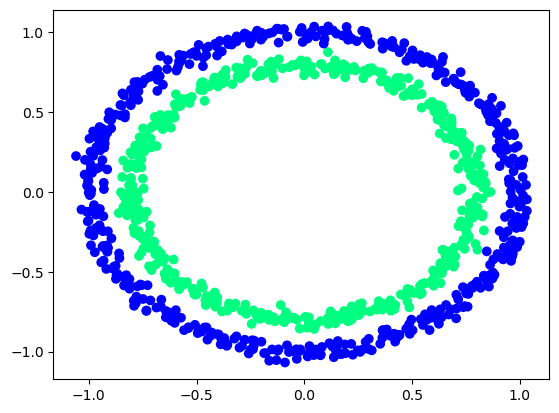

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x=circles.X1, y=circles.X2, c=circles.label, cmap="winter")
plt.show()

# Turn Dataframes in to tensors.
Lets verify the dimensions are keep the same


In [35]:
import torch 
print(f"numpy X shape: {X.shape}, numpy y shape: {y.shape}")

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(f"X shape: {X.shape}, y shape: {y.shape}")

numpy X shape: (1000, 2), numpy y shape: (1000,)
X shape: torch.Size([1000, 2]), y shape: torch.Size([1000])


In [36]:
# Make device agnostic 
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [38]:
# Split the data 80/20
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: torch.Size([800, 2]), y_train shape: torch.Size([800])
X_test shape: torch.Size([200, 2]), y_test shape: torch.Size([200])


# Build the model


In [41]:
import torch.nn as nn

# This model will take the 2 input features from our data X and will output 1 value (binary classification)
# This value will be a prediction of the class label (0 or 1)
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

model_0 = (
    CircleModelV0()
    .to(device) # Moves the model and all of its parameters (weights and biases) to the specified device
)


now that we have a model, lets use it to make predictions. Remember these predictions comes from an untrained model.

In [42]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.1404],
        [ 0.2213],
        [ 0.0905],
        [ 0.0044],
        [ 0.0879],
        [-0.1004],
        [-0.0778],
        [-0.0733],
        [ 0.1929],
        [ 0.1930]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 0.])
